In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

# Set up plotting style
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 12

# File paths
filename_base = "pythia_run_output" 
# filename_base = "arg_at_5GeV"
events_file = f"{filename_base}_events.parquet"
particles_file = f"{filename_base}_particles.parquet"

print("Setting up visualization environment...")
print(f"Events file: {events_file}")
print(f"Particles file: {particles_file}")

# Load the data
try:
    events_df = pd.read_parquet(events_file)
    particles_df = pd.read_parquet(particles_file)
    
    print("Data loaded successfully!")
    print(f"Events: {len(events_df)} events")
    print(f"Particles: {len(particles_df)} particles")
    print(f"Average particles per event: {len(particles_df)/len(events_df):.1f}")
    
    # Display basic info about the data
    print("\nEvent-level columns:", list(events_df.columns))
    print("Particle-level columns:", list(particles_df.columns))
    
except FileNotFoundError as e:
    print(f"Error: Could not find data files. Make sure you have run the pythia_parquet.py script first.")
    print(f"Looking for: {events_file} and {particles_file}")
    print("You may need to adjust the file paths above.")

Setting up visualization environment...
Events file: pythia_run_output_events.parquet
Particles file: pythia_run_output_particles.parquet
Data loaded successfully!
Events: 1000 events
Particles: 700525 particles
Average particles per event: 700.5

Event-level columns: ['event_id', 'impact_parameter', 'n_partproj', 'n_parttarg', 'n_participants', 'n_collisions', 'hi_weight', 'hi_weightSum', 'sigma_gen', 'sigma_gen_err', 'weight', 'weightSum', 'n_particles', 'mean_pT', 'mean_eta', 'mean_phi', 'event_plane_angle', 'qx', 'qy']
Particle-level columns: ['event_id', 'particle_id', 'pT', 'eta', 'phi', 'charge']


In [2]:
# Display sample data and statistics
print("Sample event-level data:")
display(events_df.head())
print("\nEvent-level data statistics:")
display(events_df.describe())

print("\n" + "="*50)
print("Sample particle-level data:")
display(particles_df.head())
print("\nParticle-level data statistics:")
display(particles_df.describe())

Sample event-level data:


,event_id,impact_parameter,n_partproj,n_parttarg,n_participants,n_collisions,hi_weight,hi_weightSum,sigma_gen,sigma_gen_err,weight,weightSum,n_particles,mean_pT,mean_eta,mean_phi,event_plane_angle,qx,qy
0,0,3.968497,4,3,7,3,337.688124,675.376248,3376.881240,3376.881240,337.688124,337.688124,301,0.311466,0.662070,-0.030314,1.374649,-10.769019,4.455584
1,1,6.162131,2,3,5,2,431.932226,8805.431245,1539.240700,1225.966388,431.932226,769.620350,191,0.314353,-0.514977,0.055361,-1.490757,-9.506686,-1.534941
2,2,2.482827,10,9,19,6,303.676236,12175.674743,1073.296586,660.654535,303.676236,1073.296586,1109,0.355190,0.089970,0.051200,-1.182117,-26.618609,-26.194058
3,3,6.271875,1,1,2,1,438.510091,13052.694925,1374.369706,576.583330,438.510091,1511.806677,12,0.327239,-5.638925,-0.354284,0.409792,0.603344,0.646073
4,4,6.407773,1,1,2,1,446.959816,13946.614557,1632.305411,511.495243,446.959816,1958.766493,4,0.570062,-3.459339,-1.234050,1.296451,-1.501009,0.917576



Event-level data statistics:


,event_id,impact_parameter,n_partproj,n_parttarg,n_participants,n_collisions,hi_weight,hi_weightSum,sigma_gen,sigma_gen_err,weight,weightSum,n_particles,mean_pT,mean_eta,mean_phi,event_plane_angle,qx,qy
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,499.500000,4.372866,5.550000,5.658000,11.208000,3.618000,370.032109,2.630977e+06,1529.759888,19.230660,370.032109,185173.146953,700.525000,0.345265,-0.104357,-0.001467,-0.004472,0.500397,0.036799
std,288.819436,1.818824,4.192741,4.211742,8.037122,2.686502,74.160325,1.679443e+06,102.669322,121.230730,74.160325,106780.078225,583.572153,0.043451,1.302182,0.123805,0.882083,16.653843,16.101139
min,0.000000,0.189722,1.000000,1.000000,2.000000,1.000000,283.746759,6.753762e+02,1073.296586,2.404641,283.746759,337.688124,2.000000,0.050783,-6.191206,-1.234050,-1.570201,-134.273849,-80.085553
25%,249.750000,3.052094,2.000000,2.000000,4.000000,1.000000,314.461547,1.095568e+06,1493.529700,3.215298,314.461547,93319.548109,194.750000,0.325000,-0.534772,-0.049520,-0.761573,-5.890519,-6.990481
50%,499.500000,4.416420,5.000000,5.000000,9.000000,3.000000,352.032280,2.825996e+06,1503.155046,4.748820,352.032280,184708.540922,547.500000,0.347656,-0.055688,-0.001649,-0.008564,0.316419,-0.046087
75%,749.250000,5.708266,9.000000,9.000000,17.000000,5.000000,406.911147,4.028526e+06,1533.207038,9.718250,406.911147,277539.984676,1115.750000,0.368838,0.438631,0.050029,0.760468,7.016863,7.337085
max,999.000000,10.360656,16.000000,16.000000,31.000000,12.000000,931.356168,5.511940e+06,3376.881240,3376.881240,931.356168,370032.109430,2593.000000,0.570062,5.611816,0.884599,1.565951,131.515107,81.364536



Sample particle-level data:


,event_id,particle_id,pT,eta,phi,charge
0,0,2212,0.704005,9.175623,-2.423316,1.0
1,0,2212,1.123518,-8.567177,1.014570,1.0
2,0,-211,0.135182,1.782342,0.196225,-1.0
3,0,2212,0.646959,3.059750,0.605453,1.0
4,0,-211,0.259113,-6.538206,0.461714,-1.0



Particle-level data statistics:


,event_id,particle_id,pT,eta,phi,charge
count,700525.000000,700525.000000,700525.000000,700525.000000,700525.000000,700525.000000
mean,499.181708,47.714707,0.357155,-0.032800,-0.000038,0.007978
std,284.188658,585.233565,0.384403,4.106686,1.812872,0.690582
min,0.000000,-2212.000000,0.000109,-13.325948,-3.141577,-1.000000
25%,265.000000,11.000000,0.119258,-3.172603,-1.567684,0.000000
50%,492.000000,22.000000,0.252459,-0.044789,0.002410,0.000000
75%,739.000000,211.000000,0.467033,3.112540,1.565061,0.000000
max,999.000000,2212.000000,28.617196,12.791099,3.141585,1.000000


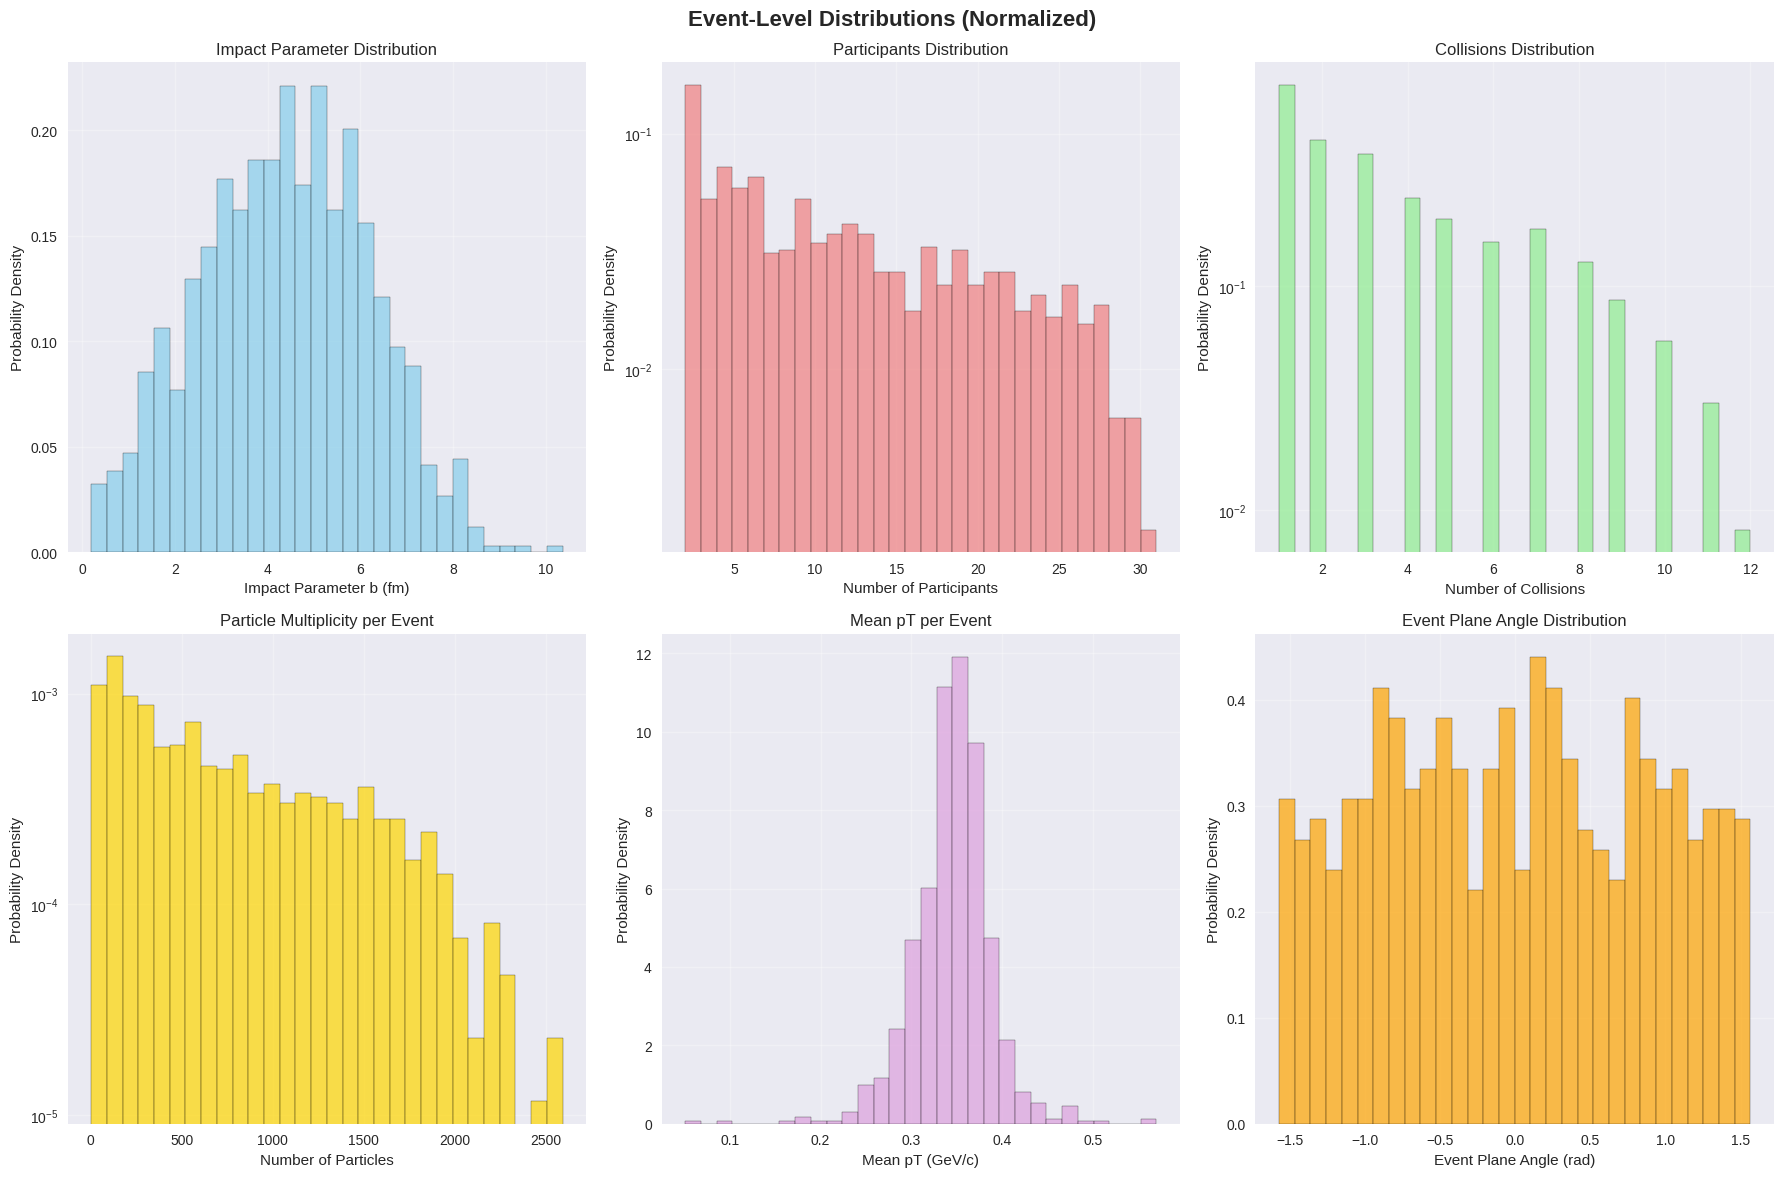

In [5]:
# Event-level histograms (normalized)
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle('Event-Level Distributions (Normalized)', fontsize=16, fontweight='bold')

# Get total number of events for normalization
n_events = len(events_df)

# Impact parameter
axes[0,0].hist(events_df['impact_parameter'], bins=30, alpha=0.7, color='skyblue', edgecolor='black', density=True)
axes[0,0].set_xlabel('Impact Parameter b (fm)')
axes[0,0].set_ylabel('Probability Density')
axes[0,0].set_title('Impact Parameter Distribution')
axes[0,0].grid(True, alpha=0.3)

# Number of participants
axes[0,1].hist(events_df['n_participants'], bins=30, alpha=0.7, color='lightcoral', edgecolor='black', density=True)
axes[0,1].set_xlabel('Number of Participants')
axes[0,1].set_ylabel('Probability Density')
axes[0,1].set_title('Participants Distribution')
axes[0,1].set_yscale('log')  # Log scale for better visibility
axes[0,1].grid(True, alpha=0.3)

# Number of collisions
axes[0,2].hist(events_df['n_collisions'], bins=30, alpha=0.7, color='lightgreen', edgecolor='black', density=True)
axes[0,2].set_xlabel('Number of Collisions')
axes[0,2].set_ylabel('Probability Density')
axes[0,2].set_title('Collisions Distribution')
axes[0,2].set_yscale('log')  # Log scale for better visibility
axes[0,2].grid(True, alpha=0.3)

# Number of particles per event
axes[1,0].hist(events_df['n_particles'], bins=30, alpha=0.7, color='gold', edgecolor='black', density=True)
axes[1,0].set_xlabel('Number of Particles')
axes[1,0].set_ylabel('Probability Density')
axes[1,0].set_title('Particle Multiplicity per Event')
axes[1,0].set_yscale('log')  # Log scale for better visibility
axes[1,0].grid(True, alpha=0.3)

# Mean pT per event
axes[1,1].hist(events_df['mean_pT'], bins=30, alpha=0.7, color='plum', edgecolor='black', density=True)
axes[1,1].set_xlabel('Mean pT (GeV/c)')
axes[1,1].set_ylabel('Probability Density')
axes[1,1].set_title('Mean pT per Event')
axes[1,1].grid(True, alpha=0.3)

# Event plane angle
axes[1,2].hist(events_df['event_plane_angle'], bins=30, alpha=0.7, color='orange', edgecolor='black', density=True)
axes[1,2].set_xlabel('Event Plane Angle (rad)')
axes[1,2].set_ylabel('Probability Density')
axes[1,2].set_title('Event Plane Angle Distribution')
axes[1,2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

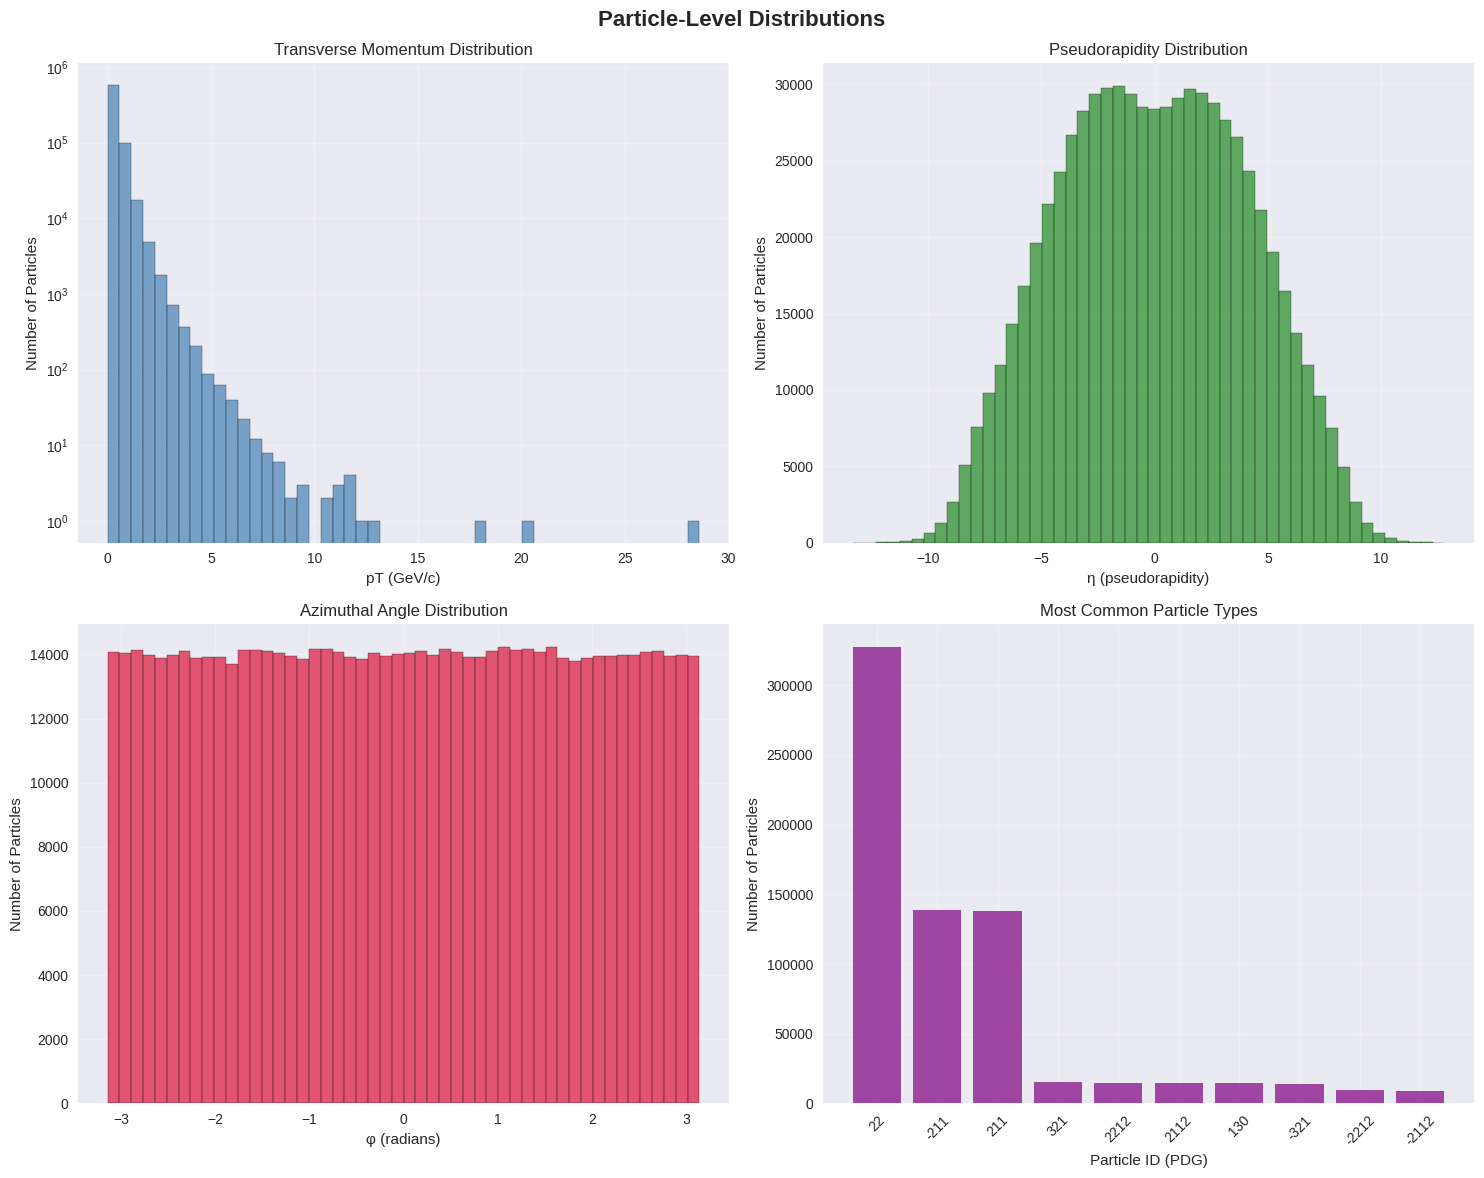

Most common particles (PDG IDs):
  PDG 22: 327386 particles
  PDG -211: 138502 particles
  PDG 211: 137762 particles
  PDG 321: 15048 particles
  PDG 2212: 14880 particles


In [ ]:
# Particle-level histograms (normalized per event)
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('Particle-Level Distributions (Per Event)', fontsize=16, fontweight='bold')

# Get total number of events for normalization
n_events = len(events_df)

# pT distribution
counts, bins, patches = axes[0,0].hist(particles_df['pT'], bins=50, alpha=0.7, color='steelblue', edgecolor='black')
# Normalize by number of events
bin_width = bins[1] - bins[0]
normalized_counts = counts / n_events / bin_width
axes[0,0].clear()
axes[0,0].bar(bins[:-1], normalized_counts, width=bin_width, alpha=0.7, color='steelblue', edgecolor='black')
axes[0,0].set_xlabel('pT (GeV/c)')
axes[0,0].set_ylabel('Particles per Event per GeV/c')
axes[0,0].set_title('Transverse Momentum Distribution')
axes[0,0].set_yscale('log')  # Log scale for better visibility
axes[0,0].grid(True, alpha=0.3)

# eta distribution
counts, bins, patches = axes[0,1].hist(particles_df['eta'], bins=50, alpha=0.7, color='forestgreen', edgecolor='black')
# Normalize by number of events
bin_width = bins[1] - bins[0]
normalized_counts = counts / n_events / bin_width
axes[0,1].clear()
axes[0,1].bar(bins[:-1], normalized_counts, width=bin_width, alpha=0.7, color='forestgreen', edgecolor='black')
axes[0,1].set_xlabel('η (pseudorapidity)')
axes[0,1].set_ylabel('Particles per Event per η unit')
axes[0,1].set_title('Pseudorapidity Distribution')
axes[0,1].grid(True, alpha=0.3)

# phi distribution
counts, bins, patches = axes[1,0].hist(particles_df['phi'], bins=50, alpha=0.7, color='crimson', edgecolor='black')
# Normalize by number of events
bin_width = bins[1] - bins[0]
normalized_counts = counts / n_events / bin_width
axes[1,0].clear()
axes[1,0].bar(bins[:-1], normalized_counts, width=bin_width, alpha=0.7, color='crimson', edgecolor='black')
axes[1,0].set_xlabel('φ (radians)')
axes[1,0].set_ylabel('Particles per Event per radian')
axes[1,0].set_title('Azimuthal Angle Distribution')
axes[1,0].grid(True, alpha=0.3)

# Particle ID distribution (most common particles) - normalized per event
particle_counts = particles_df['particle_id'].value_counts().head(10)
normalized_counts = particle_counts / n_events
axes[1,1].bar(range(len(normalized_counts)), normalized_counts.values, alpha=0.7, color='purple')
axes[1,1].set_xlabel('Particle ID (PDG)')
axes[1,1].set_ylabel('Particles per Event')
axes[1,1].set_title('Most Common Particle Types (Per Event)')
axes[1,1].set_xticks(range(len(normalized_counts)))
axes[1,1].set_xticklabels(normalized_counts.index, rotation=45)
axes[1,1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Print the most common particles (per event)
print("Most common particles (per event):")
for pid, count in particle_counts.head().items():
    avg_per_event = count / n_events
    print(f"  PDG {pid}: {avg_per_event:.3f} particles per event")